文献：

## A Comprehensive Survey of Dynamic Graph Neural Networks: Models, Frameworks, Benchmarks, Experiments and Challenges

## 每个部分说了什么， 我学到什么：

### 摘要

本篇是一个全面的综述，以评估动态图神经网络领域中各种方法的性能、优势与局限。 本文提出了一种新的分类法， 用于分类现有的网络、框架、算法。

什么是动态图神经网络？

： 动态图神经网络（GNNs）将时序信息与图神经网络相结合，能够同时捕捉动态图中的结构、时间和上下文关系，从而在多种应用中实现性能提升。

**重点： 在于时序，节点之间的关系会发生变化**

本文评价指标：评估指标包括收敛精度、训练效率以及GPU内存使用情况


本文旨在提供一份全面且与时俱进的动态图神经网络综述，涵盖最新研究进展。提出了新的分类方法，以适应DGNN模型演进的趋势，探索现有框架与评估基准，同时对主要DGNN模型与框架进行系统实验比较，并探讨动态图GNN领域面临的新兴应用需求与挑战。

贡献包括：

C1：全面综述和DGNN模型的新型分类法。调研了81个最新DGNN模型，并在第3节提出一种新颖的分类方法。该方法按结构、特性与动态建模方式对模型进行分类，有助于更清晰地了解各模型的优劣。

C2：现有DGNN框架概览。在第4节总结了当前12个DGNN框架，探讨它们的特性和在模型优化方面的改进，强调其灵活性、可扩展性与性能。

C3：DGNN评估基准介绍。在第5节展示了多个常用图数据集与评估指标，帮助提高实验评估的全面性与可复现性。

C4：代表性模型与框架的实验对比。在统一的实验设置下，对不同DGNN模型与框架进行全面比较，包括训练精度、效率、内存使用情况和多GPU扩展能力（第6节）。

C5：DGNN挑战分析。在第7节分析DGNN模型和框架当前面临的新挑战，并为后续研究提出潜在方向建议。

：我需要去了解这些方法和框架然后看看结合

## 背景
### 2.1 应用场景

1. **社交网络中的时间交互图**  ：捕捉社交网络用户之间随时间变化的关系与交互，帮助理解社会动态和网络演化。

2. **电商中的实时交易图** ：建模用户与商品之间的实时交易与交互，用于欺诈检测、推荐系统及个性化营销。

3. **时空图（STG）** ： 融合空间和时间信息，节点表示空间位置，边表示空间关系，广泛应用于交通分析、城市规划和环境监测。

4. **时间知识图谱（TKG）** ： 在传统知识图谱基础上加入时间维度，跟踪实体与关系的变化，应用于趋势分析和社交网络研究等领域。

5. **时间引用图（TCG）**  ： 跟踪学术出版物中引用关系的演化，用于研究趋势分析、影响力传播和知识流动。

：我需要找到常用的是数据集， 本文中有所提及

### 2.2 学习任务

1. 链路预测：预测当前图中尚不存在的节点之间可能出现的连接关系。在动态图学习中，链路预测专注于特定时间点边的出现概率。

2. 节点分类：为标签未知的节点分配标签，利用图结构与部分已知标签节点信息。在动态图中，目标是在某一时间点预测节点标签。

3. 其他任务：

   - **时间节点嵌入**：学习节点随时间演化和结构变化的低维表示。
   - **时间图嵌入**：学习图在不同时间步的整体表示。
   - **事件预测**：预测动态图中未来可能发生的事件或交互。


### 2.2 动态图的表示方法

#### 2.2.1 图结构表示

本节从静态图到动态图的演化，介绍图的结构表示方法：

* **静态图表示**：
  静态图通常表示为 $G = (V, E, X)$，其中：

  * $V$ 是节点集合，
  * $E$ 是边集合，
  * $X$ 是图中节点或边的特征向量。

  通常使用邻接矩阵 $A \in \mathbb{R}^{|V| \times |V|}$ 表示图结构：当 $A[i][j] = 1$ 时，表示节点 $i$ 与节点 $j$ 之间存在一条边。此外，也可以使用边索引矩阵 $\text{EdgeIndex} \in \mathbb{R}^{2 \times |E|}$，其中每一列表示图中的一条边。例如，$\text{EdgeIndex}[0][i]$ 与 $\text{EdgeIndex}[1][i]$ 分别代表第 $i$ 条边的起始和终止节点。

* **动态图表示**：
  在静态图的基础上引入时间维度。某一时间点 $t$ 下的动态图可表示为
  $G_t = (V_t, E_t, X_t)$，其中 $V_t$、$E_t$、$X_t$ 分别表示该时间点的节点、边和特征。

  动态图的常见表示方法包括：

  * **离散时间动态图（DTDG）**：将时间轴 $T_n = [t_1, t_2, ..., t_n]$ 划分为若干个时间间隔，将动态图表示为图快照序列：
    $G_T = (G_{t_1}, G_{t_2}, ..., G_{t_n})$，每一个 $G_{t_i}$ 反映截至时间 $t_i$ 的图结构。

  * **连续时间动态图（CTDG）**：将动态图建模为事件流 $G_T = (\varepsilon_{t_1}, \varepsilon_{t_2}, ..., \varepsilon_{t_n})$。
    每个事件表示为 $\varepsilon_t = (i, j, t)$，即时间 $t$ 时刻节点 $i$ 到节点 $j$ 的一条边。CTDG 会实时更新图结构，维持任意时刻 $t$ 下的最新图 $G_t$，从而更细粒度地刻画图的动态变化。

：动态是有时间维度的， 我需要看到数据集才能清晰一些理解这个时间属性是怎么存储，数据应该是什么样的

---

#### 2.2.2 时间序列表示方法

在动态图建模中，时间序列数据可以通过两种方式表示：**显式时间** 和 **隐式时间**。

* **显式时间表示（Explicit Time Representation）**：
  将时间作为一种明确的特征输入到模型中。例如，将时间戳或时间间隔作为输入变量参与计算，使模型能够直接感知时间信息。这种方式便于进行预测等任务时使用时间作为直接的参考信息。

* **隐式时间表示（Implicit Time Representation）**：
  模型不直接使用时间戳作为输入，而是通过数据本身的顺序来学习时间关系。模型通过序列数据的排列感知时间演化，而无需显式标注时间点。这种方式侧重于结构性与时间依赖的建模，不依赖具体的时间数值。



## 2.3 动态图的学习

### 2.3.1 如何学习不同类型的图结构：

* **图神经网络（GNNs）**：
  GNN 的核心是消息传递机制（message passing），通常包含三个关键步骤：**消息传递（message）→ 聚合（aggregate）→ 更新（update）**。

* **结构注意力（Structural Attention）**：
  基于注意力机制的图学习方法在GNN中引入注意力机制，用以动态调节图中节点或边在信息传递过程中的重要性。这使得模型可以自动聚焦于关键节点或边，提高特征聚合效果和表达能力。

* **随机游走（Random Walk）**：
  随机游走方法通过在图中模拟“行走者”根据一定规则（如边的概率）在节点之间移动，探索节点之间的结构关系。通过多次随机游走并分析访问的节点序列，可以生成编码局部结构和连接模式的节点嵌入向量。


### 2.3.2 处理时间序列信息的学习方法

* **循环神经网络（RNN）**

* **时间点过程（TPP）**：
  TPP 是一种用于分析事件随时间发生规律的统计模型，其关注的是**事件的发生时刻**而非事件的数量或强度。其核心是**条件强度函数** $\lambda(t)$，表示在给定历史事件序列 $H_t$ 的前提下，未来时刻发生事件的强度或概率。

* **时间卷积网络（TCN）**：
  TCN 是一种用于时间序列建模的深度学习模型，不同于RNN，TCN采用卷积神经网络结构，能有效捕捉序列数据中的局部依赖关系，并具备并行计算优势。

* **时间注意力（Temporal Attention）**：
  时间注意力机制使模型能够在处理序列数据时，对不同时刻的信息赋予不同的重要性，有助于模型识别关键时间点的影响。

* **时间编码（Time Encoding）**：
  时间编码是将时间信息转化为可用于模型训练的特征。一种常见方法是**参数化的傅里叶特征（Fourier Features）**，可有效地表示周期性或连续的时间特征。


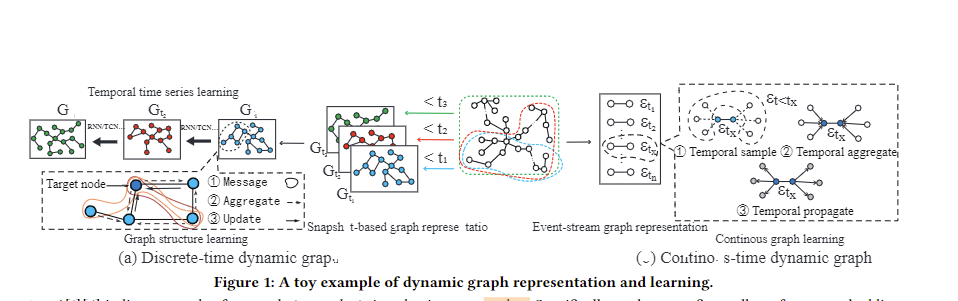

DTDG，离散时间动图， 看上图可以看出对应t1,t2,t3,时间，将关系变成多个快照，每张图代表着是时间t完整的关系，存在Message（从邻居节点收集信息），Aggregate（信息合并），Update三个过程，

CTDG，连续时间动态图，不划分快照， 按事件顺序的细粒度建模，是事件驱动，记录每一个图事件event，Temporal sample选择与目标事件相关的历史事件，Temporal aggregate根据事件的时间顺序和间隔聚合信息，Temporal propagate将聚合后的信息传播到节点表示中。


3.1 离散时间动态图模型（DTDG）

典型模型：使用GNN处理图结构数据，使用RNN处理时间序列数据。

三种进一步划分：

- 结构特定（Structural-specific）模型：图结构处理不使用GNN。
- 时间特定（Temporal-specific）模型：时间处理不使用RNN。
- 综合特定（Comprehensive-specific）模型：既不使用GNN也不使用RNN。

---

### 典型

提高准确性：

WD-GCN：最早结合GCN和LSTM的模型之一。

EvolveGCN：通过RNN更新GCN权重矩阵。

TeMP：融合关系型GCN和GRU，改进时序信息传递。

EvoNet：将图级传播与GNN+RNN结合，全面建模动态图。

RETIA：除聚合邻居外还考虑邻接关系，学习更全面。

RPC：融合GNN、GRU以及新单元RCU、PCU，建模关系与周期模式。

提高训练效率与可扩展性：

TNA：增强了GCN+GRU结构的训练稳定性。

HTGN：将动态图映射至双曲空间，引入模块约束模型稳定性。

SEIGN：结合GCN样式传播、GRU动态调整及Transformer注意机制。

专用领域应用：

LRGCN：用于路径故障预测。

T-GCN、MegaCRN：面向交通预测。

TFE-GNN：多层GNN处理图结构。

HNC：用于卫星通信状态管理。

STRIPE：首个在时空图中引入记忆网络进行异常检测的模型。

---

### 结构特定模型

提高准确性：

GCRN：将GCN与RNN结合。

VGRNN：过渡到GRNN，引入动态图自动编码器。

E-LSTM-D：首个使用LSTM和编码器-解码器结构用于链路预测。

TTGCN：基于k-truss分解方法进行动态图表示学习。

提高训练效率：
DRAIN：构建循环图生成场景，可表示跨时间的动态图学习，并在无未来数据的情况下预测未来模型。

专用应用：
HDGNN：多头注意力 + 随机游走。

DyHATR：分层注意力机制学习异构图信息。

---

### 时间特定模型

提高准确性：
SGNN-GR：用GAN生成时间信息，避免灾难性遗忘。

PI-GNN：通过参数隔离捕捉新兴模式。

STGNP：引入神经过程建模时空图。

SILD：首次研究动态图谱谱域中的分布漂移。

提高效率与可扩展性：
ROLAND：引入嵌入更新模块以支持动态图演化。

WinGNN：用随机滑窗和自适应梯度替代时间编码器，减少参数量。

SSGNN：使用回声状态网络（ESN）提升大规模图的可扩展性。

SpikeNet：用脉冲神经网络（SNN）代替RNN，降低计算复杂度。

专用应用：
RT-GCN：用于股票预测，结合关系卷积（GCN）与时间卷积（TCN）。

RISD：异构图表示学习与采样图构建。

STWave：GAT+Transformer处理时空交通预测。

STGNPP：GCN+Transformer预测交通拥堵时间。

VI-DGNN：智能交通领域的轨迹预测模型。

---

###  综合特定模型

提高准确性：

Dyngraph2vec：早期动态图模型，能捕捉时间动态。

DynGEM：使用前一步快照初始化嵌入，避免从头学习。

DySAT：通过注意机制建模结构与时间信息，优于RNN方案。

提高可扩展性：

T-SIRGN：基于SIR-GN，提高动态图建模的效率与可扩展性。

基于路径的方法：

DynamicTriad：使用三元组进行链路预测。

NetWalk：利用深度自动编码器，按路径重构节点嵌入。

全局信息建模：

DEFT：使用谱小波捕捉全局特征。

DREAM：利用时序自注意力网络建模长期演化。

EAGLE：通过建模-推理-区分-泛化范式提升外推能力。

专用应用：

STGCN：面向长期交通预测的时空建模。

TEDIC：提取动态社交交互中的细粒度模式。

DEGC：用于推荐系统中应对信息陈旧问题。

FiFrauD：无监督检测欺诈行为，支持大规模。

DyGNNExplainer：用因果生成模型探究DGNN预测因果性，包括静态、动态和无关因果。


| 类别             | 特征说明                                                 |
|------------------|----------------------------------------------------------|
| 典型 GNN + RNN   | 用 GNN 处理结构、RNN 处理时间，是最直观和常用方法       |
| 结构特定模型     | 不用 GNN 处理结构，但时间仍用 RNN                        |
| 时间特定模型     | 用 GNN 处理结构，时间不再用 RNN，而用其他方式           |
| 综合特定模型     | 结构和时间都不用 GNN/RNN，通常采用注意力、自编码器等    |


## 3.2 连续时间动态图模型（CTDG）

按处理时间事件的方法分为：

- 基于 TPP（Temporal Point Process）的方法

- 基于记忆机制的方法

- 基于随机游走的方法

更新节点的策略：

- 即时节点更新模型（Instant Node Update）

- 邻居聚合-更新模型（Neighbor Aggregation-Update）

- 更新-传播邻居模型（Update-Propagation Neighbor）

- 聚合-更新-传播模型（Aggregation-Update-Propagation）

3.2.1 基于TPP的方法
TPP（时间点过程）是一种用于建模时间动态的重要工具。如 §2.3 所述，多个研究工作采用 TPP：

Know-E [112]：率先在 CTDG 中使用 TPP，可预测潜在事件发生时间，基于事件及关系时间序列更新节点嵌入。

DyREP [113]：将模型更新划分为三部分，使用TPP为邻居节点计算时间注意力。

M2DNE [77]：引入宏观约束进行网络扩展，并通过微观时间注意力聚合实现细粒度建模。

GHN [40]：使用 Hawkes 过程建模实体交互时间动态，提出新评估指标预测时间知识图谱关系。

LDG [59]：改进了长期边信息质量问题。

DynShare [150]：设计了一个基于TPP的区间感知个性化投影算子，支持不同用户在相同时间段内的多样化选择。

它们虽都使用 TPP，但用法不同：
DyREP、GHN、LDG、DynShare 将 TPP 融入前向传播；而 Know-E、M2DNE 则用于目标函数的计算。

3.2.2 基于记忆机制的方法
这类 CTDG 模型采用内存机制保留历史信息以便嵌入更新。

TGN [95]：使用内存存储历史节点数据，在事件到来时更新。

APAN [121]：采用异步处理方式，将模型推理与图计算分离，使用邮箱机制传播信息，避免更新时邻居聚合。

NAT [78]：引入基于字典的邻居表示和N-cache结构，实现GPU并行访问。

GDCF [38]：应用于人群流建模，利用内存加快更新。

TIGER [145]：设计双重内存模块，弥补 TGN 局限。

PRES [106]：使用高斯混合模型纠正并预测基于历史梯度的新内存状态。

3.2.3 基于随机游走的方法
CTDNE [84]：最早的动态图嵌入方法之一，将时间信息引入网络嵌入，使用时间感知的随机游走建模。

CAW [122]：基于因果匿名随机游走建模，采用匿名策略保持方法的归纳性并学习结构模式间的关联。

3.2.4 即时节点更新模型（Instant Node Update）
如图3(a)所示，这类模型仅基于当前事件及涉及的节点更新嵌入，不考虑邻居影响：

JODIE [62]：使用投影模块预测未来节点轨迹，划分为静态与动态嵌入以分别建模不变与变化特征。

3.2.5 邻居聚合-更新模型（Neighbor Aggregation-Update）
如图3(b)所示，此类模型结合事件数据、历史信息及邻居信息更新节点嵌入，方法常见于CTDG：

时间加权模型（Temporal-Aware Weighting）：
TDGNN [93]：使用TDAgg聚合函数结合节点属性与边时间信息建模。

DGELL [108]：包含交互潜力、时间衰减邻居增强、局部共生学习三过程。

AER-AD [21]：用于动态二部图的归纳异常检测。

GraphNOTEARS [20]：首个研究有向无环图学习问题的模型。

SimpleDyG [127]：将动态图映射为序列提高可扩展性。

DyGFormer [138]：基于Transformer的动态图学习框架。

DHGAS [147]：首个动态异构图神经架构搜索方法，支持动态+异构邻居聚焦。

顺序 RNN 模型（Sequential RNN）：
RE-Net [53]：使用RNN建模时间、关系和交互动态。

HierTCN [136]：高层用RNN建模长期兴趣，低层用TCN预测短期交互。

DynGESN [111]：使用回声状态网络（ESN）建模动态图。

时间编码模型（Time Encoding）：
TGAT [129]：融合时间编码与自注意力，构建 TGAT 层。

DGCF [70]：建模动态用户-项目关系。

OTGNet [24]：将 TGAT 扩展用于开放时间图。

TGRank [107]：提高链接预测表达能力。

FreeDyG [110]：引入交互频率编码模块捕捉邻居比例与节点频率。

3.2.6 更新-传播邻居模型（Update-Propagation Neighbor）
如图3(c)所示，此类模型仅使用事件与历史信息进行更新，然后将信息传播给邻居：

DyGNN [80]：使用LSTM先更新事件节点，再将事件信息传播给邻居。

SUPA [125]：为事件节点生成子图，更新后在图内传播。

3.2.7 聚合-更新-传播模型（Aggregation-Update-Propagation）
如图3(d)所示，此类模型先从历史邻居聚合信息进行嵌入更新，然后传播：

CDGP [48]：用于社区动态图中的流行度预测，先识别事件所在社区，聚合社区节点进行更新，再将社区影响扩展到其他节点。



评估了不同系统的功能和适用性，主要包括**通用性**、**可扩展性**和**支持的功能模块**。

---

| 系统名称               | 支持 DTDG | 支持 CTDG | 单机单卡 | 单机多卡 | 多机多卡 | 时间邻居存储 | 特征提取优化 | 时间并行训练 | 支持功能说明 |
| ------------------ | ------- | ------- | ---- | ---- | ---- | ------ | ------ | ------ | ------ |
| PyGT \[99]         | ✔       | ✘       | ✔    | ✘    | ✘    | 存储快照   | ✘      | ✘      | -      |
| ESDG \[12]         | ✔       | ✘       | ✔    | ✔    | ✔    | 存储快照   | ✘      | ✔      | 快照并行   |
| PiPAD \[118]       | ✔       | ✘       | ✔    | ✔    | ✔    | 存储快照   | 提取公共快照 | ✔      | 快照并行   |
| DynaGraph \[33]    | ✔       | ✔       | ✔    | ✔    | ✔    | 存储快照   | ✘      | ✔      | 快照分区并行 |
| BLAD \[26]         | ✔       | ✔       | ✔    | ✔    | ✔    | 存储快照   | ✘      | ✔      | 运算符并行  |
| TGL \[155]         | ✔       | ✔       | ✔    | ✔    | ✔    | 邻居静态排序 | ✘      | ✔      | 小批量并行  |
| DistTGL \[156]     | ✔       | ✔       | ✔    | ✔    | ✔    | 邻居静态排序 | ✘      | ✔      | 内存并行   |
| NeutronStream\[13] | ✔       | ✔       | ✔    | ✔    | ✔    | 存储事件流  | ✘      | ✔      | 事件组并行  |
| SPEED \[15]        | ✔       | ✔       | ✔    | ✔    | ✔    | 存储静态图  | ✘      | ✔      | 子图分区并行 |
| DyGLib \[138]      | ✔       | ✔       | ✔    | ✔    | ✔    | 存储事件流  | ✘      | ✔      | -      |
| Zebra \[71]        | ✔       | ✔       | ✔    | ✔    | ✔    | 存储事件流  | ✘      | ✔      | -      |
| GNNFlow \[153]     | ✔       | ✔       | ✔    | ✔    | ✔    | 存储事件流  | 向量缓存   | ✘      | -      |

---


时间邻居存储（Temporal neighbor storage）：模型是否具有存储和管理节点历史邻居信息的能力，如“快照”、“事件流”等。

特征提取优化（Feature extraction optimizing）：是否支持特征提取或快照聚合优化机制，如“提取公共快照”或“向量缓存”。

时间并行训练（Temporal parallel training）， 是否支持时间维度的并行训练（如同时处理多个时间段），可具体分为：

  * **Snapshot parallelism**：快照级并行
  * **Snapshot partition parallelism**：快照划分并行
  * **Operator parallelism**：操作符并行
  * **Small-batch parallelism**：小批训练并行
  * **Memory parallelism**：内存级并行
  * **Event group parallelism**：事件分组并行
  * **Subgraph partition parallelism**：子图分区并行

评价指标：

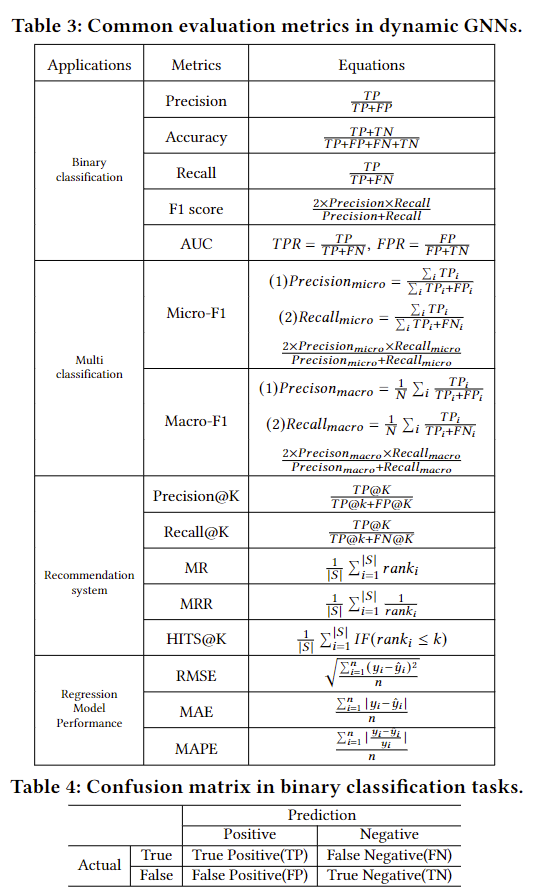

数据集：


社交网络（Social Networks）

Reddit：一个月的Reddit发帖数据，用户与子版块为节点，发帖为带时间戳的边。

DGraphFin：真实金融社交网络，节点为用户，边为紧急联系人关系。

Enron：公司内部邮件记录，边表示邮件交流。

Facebook：用户之间的互动关系图。

Social Evolution：MIT实验室采集的人际关系演化数据。

UCI：加州大学欧文分校学生间的消息通信数据。

交互网络（Interaction Networks）

Wikipedia：用户与编辑页面的二部图，边表示编辑行为。

MOOC：大规模在线课程平台中用户行为记录，如看视频、提交作业。

ML25M：用户评分电影的行为记录。

LastFM：用户一个月内的听歌行为数据。

FB-FORUM：与Facebook用户社交数据配套的论坛互动数据。

DBLP：学术合作网络，边表示合著关系。

Yelp：用户对商家的评价数据，包含评论和交互。

事件网络（Event Networks）

ICEWS / GDELT：基于新闻或文章提取的事件图，节点为国家或组织，边为某种行为（如威胁、表态等），反映真实世界动态互动。

交易网络（Trade Networks）

Bitcoin-OTC / Bitcoin-Alpha：比特币用户间的信任关系网络，基于比特币交易平台。

交通网络（Traffic Networks）

AS-733：基于互联网路由器的数据通信图。

Flights：机场之间的航班网络，节点为机场，边为航班。


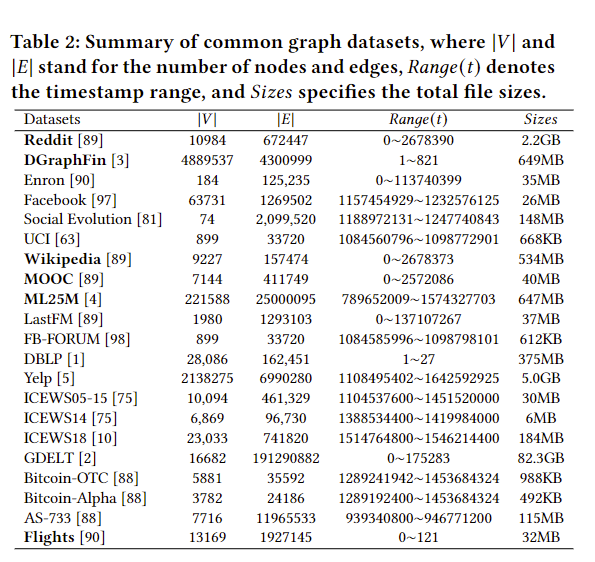